#Програмна реалізація з нуля

Розглянемо далі приклад програмної реалізації основних операторів генетичного алгоритму на базовому Python без використання спеціалізованих бібліотек. Будемо розробляти відповідні функції для розв'язання практичної задачі оптимізації.

Розглянемо простий приклад застосування генетичного алгоритму для безумовної оптимізації. Тобто, будемо шукати мінімум простої двохвимірної функції Еклі:

$$
A(x, y) = -20 \exp\left(-0.2 \sqrt{0.5(x^2 + y^2)}\right) - \exp\left(0.5(\cos(2\pi x) + \cos(2\pi y))\right) + e + 20.
$$

Для цього покроково побудуємо генетичний процес пошуку оптимального розв'язку.

Спочатку, задамо через numpy представлення даної функції.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def ackley(x, a=20, b=0.2, c=2*np.pi):
    d = x.shape[1]  # Dimension of the input
    sum_sq_term = -b * np.sqrt(np.sum(x**2, axis=1) / d)
    cos_term = np.sum(np.cos(c * x), axis=1) / d
    return -a * np.exp(sum_sq_term) - np.exp(cos_term) + a + np.exp(1)

x = np.array([-2, 0.5, 3])
print(f"Ackley function value in {x.reshape(1,3)} = {ackley(x.reshape(1,3))}")

Ackley function value in [[-2.   0.5  3. ]] = [8.1859025]


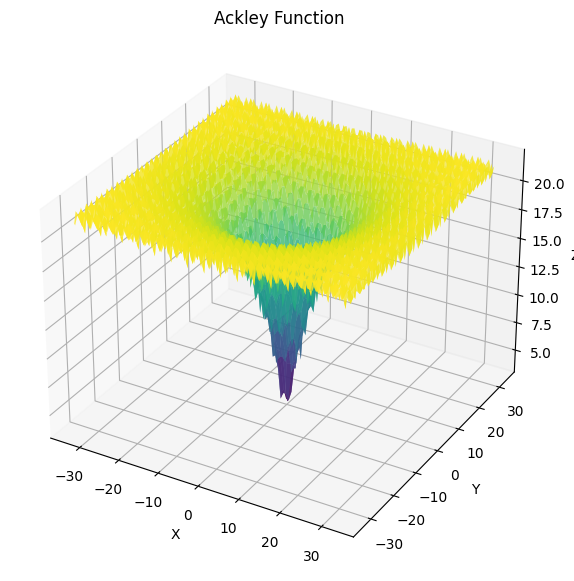

In [ ]:
# lets' visualize Ackley function
from mpl_toolkits.mplot3d import Axes3D

# Define range for x and y
x = np.linspace(-32.768, 32.768, 100)
y = np.linspace(-32.768, 32.768, 100)

# Create grid of points
X, Y = np.meshgrid(x, y)
Z = ackley(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape)

# Plot the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_title('Ackley Function')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

Додамо функції ініціалізації та обчислення цільової функції.

In [ ]:
# Generate initial population
def initialize_population(size, dim, bounds):
    pop = np.random.uniform(bounds[0], bounds[1], (size, dim))
    print(f"Population shape: {pop.shape}")
    return pop

# Evaluate fitness
def evaluate_fitness(population, dimension=2):
    return ackley(x=population)

Реалізуємо операції кросоверу та мутації.

In [ ]:
# Crossover
def crossover(population, parents_index, offspring_size):
    offspring = np.empty(offspring_size)
    # Accessing the number of columns in offspring_size tuple
    crossover_point = np.uint8(offspring_size[1] / 2)

    for k in range(offspring_size[0]):  # offspring_size[0] is the number of offspring
        parent1_idx = parents_index[k % parents_index.shape[0]]
        parent2_idx = parents_index[(k + 1) % parents_index.shape[0]]
        # Split at crossover_point and assign genes from both parents
        offspring[k, :crossover_point] = population[parent1_idx, :crossover_point]
        offspring[k, crossover_point:] = population[parent2_idx, crossover_point:]

    return offspring


# Mutation
def mutation(offspring, mutation_rate, bounds):
    for idx in range(offspring.shape[0]):
        if np.random.rand() < mutation_rate:
            random_val = np.random.uniform(bounds[0], bounds[1])
            random_index = np.random.randint(0, offspring.shape[1])
            offspring[idx, random_index] = random_val

    return offspring

Додаємо функцію турнірної селекції, яка полягає у таких кроках:


1. З популяції випадковим чином вибираються кілька особин, зазвичай 2-4. Кількість особин у турнірі називається розміром турніру.
2. Змагання:
Вибрані особини "змагаються" між собою на основі їхньої фітнес-функції — міри їхньої пристосованості. Фітнес може бути оцінений за різними параметрами, залежно від задачі, наприклад, мінімізація витрат, максимізація продуктивності тощо.
3. Вибір переможця:
Переможець турніру, тобто особина з найкращим значенням фітнес-функції серед учасників, вибирається для подальшого розмноження.

In [ ]:
def select_parents(fitness, num_parents):
    # Tournament selection
    parents_index = np.argsort(fitness)
    return parents_index[:num_parents]

Та реалізовуємо кроки генетичного алгоритму

In [ ]:
# Main GA function
def genetic_algorithm():
    pop_size = 20
    num_generations = 250
    dim = 2
    bounds = (-32, 32)
    mutation_rate = 0.1
    num_parents = int(pop_size / 2)
    num_offspring = pop_size - num_parents  # Ensure total population size remains constant
    fitness_history = []

    # Initialize population
    population = initialize_population(pop_size, dim, bounds)

    for generation in range(num_generations):
        # Evaluate the fitness
        fitness = evaluate_fitness(population)
        fitness_history.append(np.min(fitness))

        # Select parents
        parents_index = select_parents(fitness, num_parents)

        # Generate offspring
        offspring_crossover = crossover(population, parents_index, (num_offspring, dim))

        # Apply mutation
        offspring_mutation = mutation(offspring_crossover, mutation_rate, bounds)

        # Create new population
        # Ensure the parents and offspring arrays together exactly fill the new population array
        population[:num_parents] = population[parents_index]  # Retain the selected parents
        population[num_parents:] = offspring_mutation  # Fill in the rest with new offspring

    # Plotting the convergence graph
    plt.plot(fitness_history)
    plt.title("Convergence Graph of Genetic Algorithm")
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness (Min Ackley Value)')
    plt.show()

    print(f"Best found value: {np.min(fitness)}")
    return fitness_history

Population shape: (20, 2)


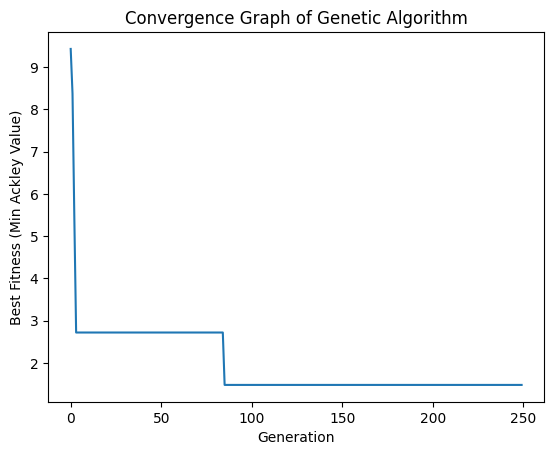

Best found value: 1.4792404878542134


In [ ]:
# Run the genetic algorithm
fitness_history = genetic_algorithm()

##Постановка задачі про рюкзак

Розглянемо варіант задачі про рюкзак, що розглядалася в курсі "Алгоритми". Але в цьому випадку будемо мати справу з товарами та їх транспортуванням. Ми можемо розглядати це як реальний приклад електронної комерції, де потрібно завантажувати товари у вантажівку для їх подальшого розподілу по філіях компанії. У даному випадку в наявності 14 товарів і одна вантажівка. Кожен товар характеризується об'ємом і ціною. Наприклад, холодильник А має об'єм 0.751 кубометра та вартість 999.90.

![picture](https://drive.google.com/uc?id=1FoS6pgoHEloxgKybBfKhoWNgFknoXgQe)

Слід зауважити, що холодильник займає найбільше місце у вантажівці, тоді як мобільний телефон займає найменше місце.

Щодо ціни, телевізор є найдорожчим продуктом, проте також потребує значного об'єму у вантажівці.

Максимальний об'єм вантажівки складає 3 кубометри, тому неможливо перевезти всі товари за одну поїздку.

Таким чином, метою цієї задачі є знаходження найдорожчих продуктів, які при цьому займають максимальний об'єм вантажівки.

Наприклад, може статися так, що холодильник буде менш прибутковим, ніж мобільний телефон, проте займатиме значно більше простору.

Оптимальним рішенням у цьому випадку може стати транспортування найбільш прибуткових продуктів з урахуванням максимального використання об'єму вантажівки.

Наведений приклад є синтетичним і відображає гіпотетичні дані компанії. У реальності електронна комерція може мати тисячі продуктів, кожен з них в наявності більше ніж одна одиниця. Таким чином, кількість комбінацій для реального набору даних може сягати трильйонів. Для знаходження найкращого набору продуктів, які слід перевозити у вантажівці, можна використовувати генетичні алгоритми.

#Програмна реалізація

Клас продукту

In [ ]:
class Product():
  """Represents any product by given name, space and price."""
  def __init__(self, name: str, space: float, price: float) -> None:
    self.name = name
    self.space = space
    self.price = price

In [ ]:
# Let's create a sample
p1 = Product('Refrigerator A', 0.751, 999.9)

In [ ]:
print(f"Product name: {p1.name}, space: {p1.space}, price: {p1.price}")

Product name: Refrigerator A, space: 0.751, price: 999.9


In [ ]:
# generate some list of products
products_list = []
products_list.append(Product('Refrigerator A', 0.751, 999.90))
products_list.append(Product('Cell phone', 0.00000899, 2199.12))
products_list.append(Product('TV 55', 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))

In [ ]:
for product in products_list:
  print(product.name, ' - ', product.price, ' - ', product.space)

Refrigerator A  -  999.9  -  0.751
Cell phone  -  2199.12  -  8.99e-06
TV 55  -  4346.99  -  0.4
TV 50'   -  3999.9  -  0.29
TV 42'   -  2999.0  -  0.2
Notebook A  -  2499.9  -  0.0035
Ventilator  -  199.9  -  0.496
Microwave A  -  308.66  -  0.0424
Microwave B  -  429.9  -  0.0544
Microwave C  -  299.29  -  0.0319
Refrigerator B  -  849.0  -  0.635
Refrigerator C  -  1199.89  -  0.87
Notebook B  -  1999.9  -  0.498
Notebook C  -  3999.0  -  0.527


Клас індивіда

Індивіди будуть містити розв'язок задачі.
Вони представляють рішення проблеми. Тобто у закодованому вигляді індивіди повинні містити перелік товарів, що задовольняють обмеження.

![picture](https://drive.google.com/uc?id=1aBDxghKClAEWKglG7Kr3JAa2z4KVtaB4)

На зображенні 0 позначає відсутність товару у вантажівці, а 1 — присутність.

Індивіди також називаються хромосомами, що краще відображає біологічну аналогію.

Сукупність індивідів утворює популяцію. Параметр `generation` у конструкторі класу `Individual` позначає номер популяції, до якої належить хромосома.

Деяке початкове значення хромосоми в популяції генерується випадково.



```python
for i in range(len(spaces)):
    if random() < 0.5:
      self.chromosome.append('0')
    else:
      self.chromosome.append('1')

```

Фітнес-функція `fitness()` є цільовою функцією задачі оптимізації. Кожна хромосома буде мати свою оцінку фітнес-функції, яка позначатиме вартість даного набору товарів. Також у цій функції перевіряються обмеження, у нашому випадку — максимальна місткість вантажівки.

```python
  def fitness(self):
    score = 0
    sum_spaces = 0
    for i in range(len(self.chromosome)):
      if self.chromosome[i] == '1':
        score += self.prices[i]
        sum_spaces += self.spaces[i]
    if sum_spaces > self.space_limit:
      score = 1
    self.score_evaluation = score
    self.used_space = sum_spaces

```
Якщо не виконуються обмеження задачі, зазвичай призначають як значення фітнес-функції певну константу. Наприклад, 1 для задачі максимізації.

Функція `crossover()` реалізує найпростіший варіант кросовера — одноточковий. У нашому випадку хромосоми містять бінарні значення — гени. Отже, кросовер буде виглядати так:

![picture](https://drive.google.com/uc?id=1FhlPVe8KmlxguTk8nHzOvVIUQ_uaA33E)

А його програмна реалізація:

```python
def crossover(self, other_individual):
  cutoff = round(random() * len(self.chromosome))

  child1 = other_individual.chromosome[0:cutoff] + self.chromosome[cutoff::]
  child2 = self.chromosome[0:cutoff] + other_individual.chromosome[cutoff::]

  children = [Individual(self.spaces, self.prices, self.space_limit, self.generation + 1),
              Individual(self.spaces, self.prices, self.space_limit, self.generation + 1)]
              
  children[0].chromosome = child1
  children[1].chromosome = child2
  return children

```

У цьому прикладі Parent 1, Parent 2 належать до однієї популяції, а Child 1, Child 2 — до наступної.

Функція мутації `mutation()` реалізує випадкову мутацію даної хромосоми:



```python
 def mutation(self, rate):
    #print('Before:', self.chromosome)
    for i in range(len(self.chromosome)):
      if random() < rate:
        if self.chromosome[i] == '1':
          self.chromosome[i] = '0'
        else:
          self.chromosome[i] = '1'
    #print('After: ', self.chromosome)
    return self
```











In [ ]:
from random import random


class Individual:
  def __init__(self, spaces, prices, space_limit, generation=0):
    self.spaces = spaces
    self.prices = prices
    self.space_limit = space_limit
    self.score_evaluation = 0
    self.used_space = 0
    self.generation = generation
    self.chromosome = []

    for i in range(len(spaces)):
      if random() < 0.5:
        self.chromosome.append('0')
      else:
        self.chromosome.append('1')

  def fitness(self):
    score = 0
    sum_spaces = 0
    for i in range(len(self.chromosome)):
      if self.chromosome[i] == '1':
        score += self.prices[i]
        sum_spaces += self.spaces[i]
    if sum_spaces > self.space_limit:
      score = 1
    self.score_evaluation = score
    self.used_space = sum_spaces

  def crossover(self, other_individual):
    cutoff = round(random() * len(self.chromosome))
    #print(cutoff)

    child1 = other_individual.chromosome[0:cutoff] + self.chromosome[cutoff::]
    child2 = self.chromosome[0:cutoff] + other_individual.chromosome[cutoff::]
    #print(child1)
    #print(child2)
    children = [Individual(self.spaces, self.prices, self.space_limit, self.generation + 1),
                Individual(self.spaces, self.prices, self.space_limit, self.generation + 1)]
    children[0].chromosome = child1
    children[1].chromosome = child2
    return children

  def mutation(self, rate, echo=False):
    if echo:
        print('Before:', self.chromosome)
    for i in range(len(self.chromosome)):
      if random() < rate:
        if self.chromosome[i] == '1':
          self.chromosome[i] = '0'
        else:
          self.chromosome[i] = '1'
    if echo:
        print('After: ', self.chromosome)
    print(self)
    return self

  def __str__(self) -> str:
    return f"Individual: spaces={self.spaces}, prices={self.prices}, \n \
    score = {self.score_evaluation}, used_space={self.used_space}, \n \
    generation={self.generation}"

Протестуємо даний клас на наших даних.

In [ ]:
spaces = []
prices = []
names = []

for product in products_list:
  spaces.append(product.space)
  prices.append(product.price)
  names.append(product.name)

In [ ]:
print(spaces)

[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527]


In [ ]:
print(prices)

[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0]


In [ ]:
print(names)

['Refrigerator A', 'Cell phone', 'TV 55', "TV 50' ", "TV 42' ", 'Notebook A', 'Ventilator', 'Microwave A', 'Microwave B', 'Microwave C', 'Refrigerator B', 'Refrigerator C', 'Notebook B', 'Notebook C']


In [ ]:
names[5], prices[5], spaces[5]

('Notebook A', 2499.9, 0.0035)

Створимо одну хромосому.

In [ ]:
limit = 3

individual1 = Individual(spaces, prices, limit)
#print('Spaces: ', individual1.spaces)
#print('Prices: ', individual1.prices)
#print('Chromosome: ', individual1.chromosome)
for i in range(len(products_list)):
  #print(individual1.chromosome[i])
  if individual1.chromosome[i] == '1':
    print('Name: ', products_list[i].name)
individual1.fitness()
print('Score: ', individual1.score_evaluation)
print('Used space: ', individual1.used_space)
print('Chromosome: ', individual1.chromosome)

Name:  Refrigerator A
Name:  Microwave A
Name:  Refrigerator B
Name:  Refrigerator C
Name:  Notebook C
Score:  7356.45
Used space:  2.8254
Chromosome:  ['1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1']


Створимо нову хромосому.

In [ ]:
individual2 = Individual(spaces, prices, limit)
#print('Spaces: ', individual1.spaces)
#print('Prices: ', individual1.prices)
#print('Chromosome: ', individual1.chromosome)
for i in range(len(products_list)):
  #print(individual1.chromosome[i])
  if individual2.chromosome[i] == '1':
    print('Name: ', products_list[i].name)
individual2.fitness()
print('Score: ', individual2.score_evaluation)
print('Used space: ', individual2.used_space)
print('Chromosome: ', individual2.chromosome)

Name:  Refrigerator A
Name:  Cell phone
Name:  TV 50' 
Name:  Notebook A
Name:  Refrigerator B
Name:  Refrigerator C
Name:  Notebook C
Score:  1
Used space:  3.07650899
Chromosome:  ['1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1']


Застосуємо кросовер.

In [ ]:
children = individual1.crossover(individual2)

У результаті отримаємо двох нащадків.

In [ ]:
children[0].fitness()
print(children[0].score_evaluation)
print(children[0].chromosome)

1
['1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1']


In [ ]:
children[1].fitness()
print(children[1].score_evaluation)
print(children[1].chromosome)

7047.79
['1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1']


In [ ]:
individual1.mutation(0.1, echo=True)

Before: ['1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '1', '0', '1']
After:  ['1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1']
Individual: spaces=[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527], prices=[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0], 
     score = 7356.45, used_space=2.8254, 
     generation=0


Популяція містить декілька хромосом — декілька варіантів розв'язку задачі.

![picture](https://drive.google.com/uc?id=17a97rHP3B9i3zI0ACR7NuezAS5kVJqwg)

Для того щоб мати змогу оперувати популяціями, розраховувати для кожної хромосоми значення фітнес-функції, застосовувати кросовери й мутації, необхідно реалізувати клас, який буде містити поняття популяції.

Нижче наведено реалізацію такого класу `GeneticAlgorithm`



In [ ]:
class GeneticAlgorithm():
  def __init__(self, population_size):
    self.population_size = population_size
    self.population = []
    self.generation = 0
    self.best_solution = None
    self.list_of_solutions = []

  def initialize_population(self, spaces, prices, space_limit):
    for i in range(self.population_size):
      self.population.append(Individual(spaces, prices, space_limit))
    self.best_solution = self.population[0]

  def order_population(self):
    self.population = sorted(self.population,
                             key=lambda population: population.score_evaluation,
                             reverse=True)

  def best_individual(self, individual):
    if individual.score_evaluation > self.best_solution.score_evaluation:
      self.best_solution = individual

  def sum_evaluations(self):
    sum = 0
    for individual in self.population:
      sum += individual.score_evaluation
    return sum

  def select_parent(self, sum_evaluation):
    parent = -1
    random_value = random() * sum_evaluation
    sum = 0
    i = 0
    #print('*** random value:', random_value)
    while i < len(self.population) and sum < random_value:
      #print('i:', i, ' - sum: ', sum)
      sum += self.population[i].score_evaluation
      parent += 1
      i += 1
    return parent

  def visualize_generation(self):
    best = self.population[0]
    print('Generation: ', self.population[0].generation,
          'Total price: ', best.score_evaluation, 'Space: ', best.used_space,
          'Chromosome: ', best.chromosome)

  def solve(self, mutation_probability, number_of_generations, spaces, prices,
            limit):
    self.initialize_population(spaces, prices, limit)

    for individual in self.population:
      individual.fitness()
    self.order_population()
    self.best_solution = self.population[0]
    self.list_of_solutions.append(self.best_solution.score_evaluation)

    self.visualize_generation()

    for generation in range(number_of_generations):
      sum = self.sum_evaluations()
      new_population = []
      for new_individuals in range(0, self.population_size, 2):
        parent1 = self.select_parent(sum)
        parent2 = self.select_parent(sum)
        children = self.population[parent1].crossover(self.population[parent2])
        new_population.append(children[0].mutation(mutation_probability))
        new_population.append(children[1].mutation(mutation_probability))

      self.population = list(new_population)

      for individual in self.population:
        individual.fitness()
      self.order_population()
      self.visualize_generation()
      best = self.population[0]
      self.list_of_solutions.append(best.score_evaluation)
      self.best_individual(best)

    print('**** Best solution - Generation: ', self.best_solution.generation,
          'Total price: ', self.best_solution.score_evaluation, 'Space: ', self.best_solution.used_space,
          'Chromosome: ', self.best_solution.chromosome)

    return self.best_solution.chromosome

Створимо популяцію та ініціалізуємо значення.

In [ ]:
population_size = 20
ga = GeneticAlgorithm(population_size)
ga.initialize_population(spaces, prices, limit)

In [ ]:
len(ga.population)

20

In [ ]:
ga.population[0].chromosome

['0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1']

In [ ]:
ga.population[1].chromosome

['0', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '1']

Обчислимо елементи популяції.

In [ ]:
for individual in ga.population:
  individual.fitness()

ga.order_population()

for i in range(ga.population_size):
  print('Individual: ', i, '\nSpaces: ', ga.population[i].spaces, '\nPrices: ', ga.population[i].prices,
        '\nChromosome: ', ga.population[i].chromosome, '\nScore: ', ga.population[i].score_evaluation, '\n')

Individual:  0 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chromosome:  ['1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1'] 
Score:  16434.66 

Individual:  1 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chromosome:  ['1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0'] 
Score:  16302.64 

Individual:  2 
Spaces:  [0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527] 
Prices:  [999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0] 
Chromosome:  ['0', '1', '0', '1', '0', '0', '0',

In [ ]:
ga.best_solution.score_evaluation

14976.0

In [ ]:
ga.population[0].score_evaluation

16434.66

In [ ]:
ga.best_individual(ga.population[0])

In [ ]:
ga.best_solution.score_evaluation

16434.66

In [ ]:
ga.best_solution.chromosome

['1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1']

Ми знайшли кращу хромосому однієї популяції, але на практиці генетичні алгоритми створюють декілька популяцій і знаходять кращі хромосоми в них.



In [ ]:
sum = ga.sum_evaluations()
print('Sum of evaluations: ', sum)

Sum of evaluations:  182442.37999999998


In [ ]:
parent1 = ga.select_parent(sum)
parent1

12

In [ ]:
parent2 = ga.select_parent(sum)
parent2

2

In [ ]:
new_population = []
mutation_probability = 0.01

for new_individuals in range(0, ga.population_size, 2):
  #print(new_individuals)
  parent1 = ga.select_parent(sum)
  parent2 = ga.select_parent(sum)

  print('\n', parent1, parent2)
  children = ga.population[parent1].crossover(ga.population[parent2])

  print(ga.population[parent1].chromosome)
  print(ga.population[parent2].chromosome)
  print(children[0].chromosome)
  print(children[1].chromosome)

  new_population.append(children[0].mutation(mutation_probability))
  new_population.append(children[1].mutation(mutation_probability))


 1 9
['1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0']
['0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '0']
['0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0']
['1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0']
Individual: spaces=[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527], prices=[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0], 
     score = 0, used_space=0, 
     generation=1
Individual: spaces=[0.751, 8.99e-06, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527], prices=[999.9, 2199.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0], 
     score = 0, used_space=0, 
     generation=1

 0 8
['1', '1', '0', '1', '1', '0', '0', '1', '1', '1', '0', '1', '0', '1']
['1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1

Зараз у нас є все для повноцінного генетичного алгоритму. Поєднаємо всі частини.

In [ ]:
products_list = []
products_list.append(Product("Refrigerator A", 0.751, 999.90))
products_list.append(Product("Cell phone", 0.0000899, 2911.12))
products_list.append(Product("TV 55' ", 0.400, 4346.99))
products_list.append(Product("TV 50' ", 0.290, 3999.90))
products_list.append(Product("TV 42' ", 0.200, 2999.00))
products_list.append(Product("Notebook A", 0.00350, 2499.90))
products_list.append(Product("Ventilator", 0.496, 199.90))
products_list.append(Product("Microwave A", 0.0424, 308.66))
products_list.append(Product("Microwave B", 0.0544, 429.90))
products_list.append(Product("Microwave C", 0.0319, 299.29))
products_list.append(Product("Refrigerator B", 0.635, 849.00))
products_list.append(Product("Refrigerator C", 0.870, 1199.89))
products_list.append(Product("Notebook B", 0.498, 1999.90))
products_list.append(Product("Notebook C", 0.527, 3999.00))

spaces = []
prices = []
names = []

for product in products_list:
  spaces.append(product.space)
  prices.append(product.price)
  names.append(product.name)

limit = 3
population_size = 20
mutation_probability = 0.01
number_of_generations = 100

ga = GeneticAlgorithm(population_size)
result = ga.solve(mutation_probability, number_of_generations, spaces, prices, limit)
print(result)

for i in range(len(products_list)):
  if result[i] == '1':
    print('Name: ', products_list[i].name, ' - Price: ', products_list[i].price)

Streaming output truncated to the last 5000 lines.
Individual: spaces=[0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527], prices=[999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0], 
     score = 0, used_space=0, 
     generation=19
Individual: spaces=[0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527], prices=[999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0], 
     score = 0, used_space=0, 
     generation=19
Individual: spaces=[0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 0.0544, 0.0319, 0.635, 0.87, 0.498, 0.527], prices=[999.9, 2911.12, 4346.99, 3999.9, 2999.0, 2499.9, 199.9, 308.66, 429.9, 299.29, 849.0, 1199.89, 1999.9, 3999.0], 
     score = 0, used_space=0, 
     generation=19
Individual: spaces=[0.751, 8.99e-05, 0.4, 0.29, 0.2, 0.0035, 0.496, 0.0424, 

Отримані значення фітнес-функції.

In [ ]:
for value in ga.list_of_solutions:
  print(value)

24064.370000000003
22604.81
24064.370000000003
24064.370000000003
24064.370000000003
23034.710000000003
23034.710000000003
23343.370000000003
23494.370000000003
23343.370000000003
23343.370000000003
21755.81
21755.81
21755.81
22755.81
22642.760000000002
22755.81
23755.710000000003
23755.710000000003
23755.710000000003
23755.710000000003
22755.81
23755.710000000003
24064.370000000003
23034.710000000003
24185.610000000004
24185.610000000004
24055.000000000004
24185.610000000004
23185.710000000003
23485.000000000004
23334.000000000004
24055.000000000004
24484.900000000005
24484.900000000005
24484.900000000005
24484.900000000005
24494.270000000004
24793.560000000005
23334.000000000004
24185.610000000004
24185.610000000004
24185.610000000004
24793.560000000005
24363.660000000003
24793.560000000005
24793.560000000005
24793.560000000005
24793.560000000005
24793.560000000005
24793.560000000005
24793.560000000005
24793.560000000005
24793.560000000005
24793.560000000005
24793.560000000005
24793.

Крива навчання.

In [ ]:
import plotly.express as px
figure = px.line(x = range(0,101), y = ga.list_of_solutions, title = 'Зміна загальної ціни товарів у вантажівці за популяціями')
figure.show()

#Використання бібліотеки PyGad

На практиці зазвичай не реалізують код генетичних алгоритмів з нуля, а використовують поширені бібліотеки. Однією з них є бібліотека PyGad. Розглянемо далі розв'язання задачі оптимізації ваг лінійної функції за допомогою цієї бібліотеки.

Розглянемо функцію $f(x, w)$:

$f(x, w) = x_1 \cdot w_1+ x_2 \cdot w_2+x_3 \cdot w_3+x_4 \cdot w_4+x_5 \cdot w_5+x_6 \cdot w_6$



In [ ]:
%pip install pygad

import pygad
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.9 MB/s eta 0:00:00


Підготуємо тестові дані, які будемо використовувати для фітнес-функції алгоритму. Потрібно знайти ваги функції, при яких для параметрів $x_1, x_2, x_3, x_4, x_5, x_6$ (`function_inputs`) значення функції буде дорівнювати `desired_output`  

In [ ]:
function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

Дуже важливим кроком є ​​реалізація фітнес-функції, яка використовуватиметься для розрахунку значення відповідності для кожного рішення.

Якщо фітнес-функція пристосування повертає число, це означає, що проблема одноцільова (результатом буде скаляр). Якщо повертається list, tuple або numpy.ndarray, то це багатоцільова проблема.



In [ ]:
def fitness_func(ga_instance, solution, solution_idx):
    output = np.sum(solution*function_inputs)
    fitness = 1.0 / np.abs(output - desired_output)
    return fitness

Далі необхідно задати параметри роботи генетичного алгоритму. До них належить кількість популяцій, кількість батьківських хромосом, що беруть участь у кросовері, тип кросовера та мутації тощо.

In [ ]:
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

Після цього можна сформувати задачу.

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:748: UserWarning:

The percentage of genes to mutate (mutation_percent_genes=10) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.

/usr/local/lib/python3.10/dist-packages/pygad/pygad.py:1139: UserWarning:

The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.



Запустити процес еволюцій.

In [ ]:
ga_instance.run()

Та отримати найкращу хромосому, яка і буде розв'язком.

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 3.88544019  4.633574    1.90157633  4.55785728 -0.84456485  0.21451157]
Fitness value of the best solution = 701.641844792813
Predicted output based on the best solution : 44.00142522856557


##Приклад метаевристики штучного бджолиного рою (ABC)

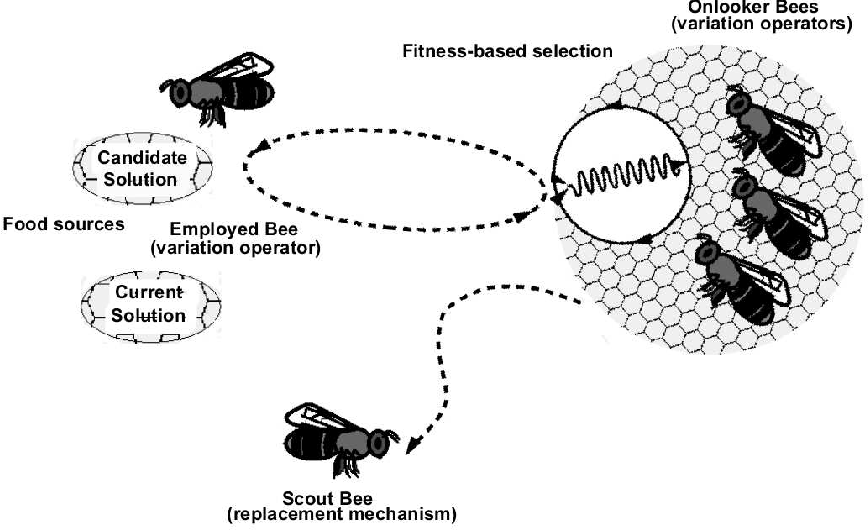[link text](https://)

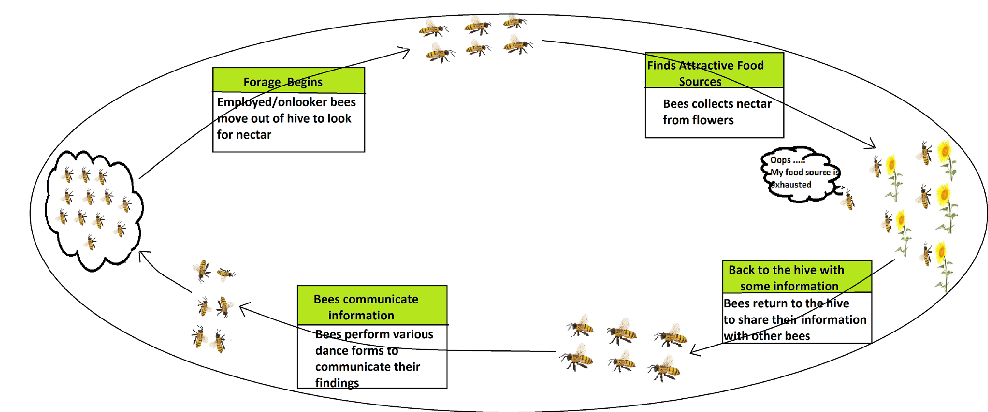

Best fitness so far: [14.79194909]
Best fitness so far: [9.09612988]
Best fitness so far: [7.2024588]
Best fitness so far: [4.71770322]
Best fitness so far: [3.13950149]
Best fitness so far: [2.65635669]
Best fitness so far: [1.63799986]
Best fitness so far: [1.63799986]
Best fitness so far: [1.12647235]
Best fitness so far: [1.04850325]
Best fitness so far: [0.48328265]
Best fitness so far: [0.21746192]
Best fitness so far: [0.1899566]
Best fitness so far: [0.16684364]
Best fitness so far: [0.05674719]
Best fitness so far: [0.05674719]
Best fitness so far: [0.04992529]
Best fitness so far: [0.04992529]
Best fitness so far: [0.02321933]
Best fitness so far: [0.02321933]
Best fitness so far: [0.02321933]
Best fitness so far: [0.01756743]
Best fitness so far: [0.01426343]
Best fitness so far: [0.01426343]
Best fitness so far: [0.00447316]
Best fitness so far: [0.00447316]
Best fitness so far: [0.00174655]
Best fitness so far: [0.00174655]
Best fitness so far: [0.00174655]
Best fitness so

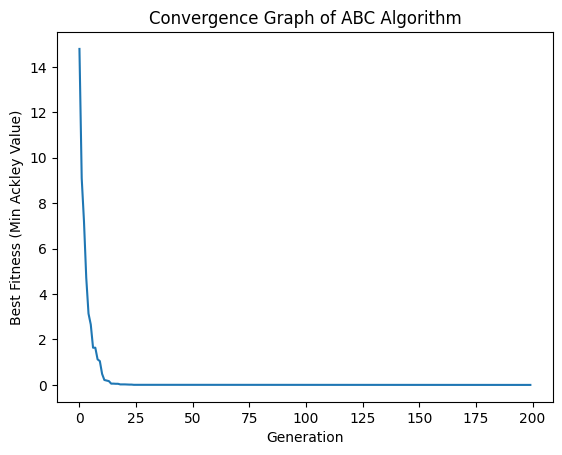

In [ ]:
class ArtificialBeeColony:
    def __init__(self, func, num_vars, lower_bound, upper_bound, num_bees, max_iter, limit):
        self.func = func
        self.num_vars = num_vars
        self.lower_bound = np.array(lower_bound)
        self.upper_bound = np.array(upper_bound)
        self.num_bees = num_bees
        self.max_iter = max_iter
        self.limit = limit
        # Ensure lower_bound and upper_bound are NumPy arrays for element-wise operations
        self.population = np.random.rand(num_bees, num_vars) * (self.upper_bound - self.lower_bound) + self.lower_bound
        self.fitness = np.array([func(ind.reshape(1, -1)) for ind in self.population])
        self.best_solution = np.copy(self.population[np.argmin(self.fitness)])
        self.best_fitness = np.min(self.fitness)
        self.trial_counter = np.zeros(num_bees)  # Initialize trial counter for each bee
        self.history = []

    def update_bee(self, index):
        phi = np.random.uniform(-1, 1, size=(self.num_vars,))
        k = np.random.randint(self.num_bees)
        while k == index:  # ensure k is not the same as index
            k = np.random.randint(self.num_bees)
        candidate = self.population[index] + phi * (self.population[index] - self.population[k])
        candidate = np.clip(candidate, self.lower_bound, self.upper_bound)
        candidate_fitness = self.func(candidate.reshape(1, -1))
        if candidate_fitness < self.fitness[index]:
            self.population[index] = candidate
            self.fitness[index] = candidate_fitness
            self.trial_counter[index] = 0
            if candidate_fitness < self.best_fitness:
                self.best_fitness = candidate_fitness
                self.best_solution = candidate
        else:
            self.trial_counter[index] += 1

    def employed_bee_phase(self):
        for i in range(self.num_bees):
            self.update_bee(i)

    def onlooker_bee_phase(self):
        # Calculate probabilities inversely related to fitness (higher fitness -> lower probability)
        fitness_prob = 1.0 / (1.0 + self.fitness)
        prob = fitness_prob / np.sum(fitness_prob)

        # Flatten the probability array to ensure it is 1-dimensional
        prob = prob.flatten()  # This makes sure 'p' is 1-dimensional

        for _ in range(self.num_bees):
            index = np.random.choice(self.num_bees, p=prob)
            self.update_bee(index)

    def scout_bee_phase(self):
        for i in range(self.num_bees):
            if self.trial_counter[i] > self.limit:  # Check if the limit is exceeded
                self.population[i] = np.random.rand(self.num_vars) * (self.upper_bound - self.lower_bound) + self.lower_bound
                self.fitness[i] = self.func(self.population[i].reshape(1, -1))
                self.trial_counter[i] = 0  # Reset the trial counter

    def optimize(self):
        for _ in range(self.max_iter):
            self.employed_bee_phase()
            self.onlooker_bee_phase()
            self.scout_bee_phase()
            print(f"Best fitness so far: {self.best_fitness}")
            self.history.append(self.best_fitness)

# Parameters
num_vars = 2  # Dimensionality of the problem
lower_bound = np.array([-32.768] * num_vars)
upper_bound = np.array([32.768] * num_vars)
num_bees = 20
max_iter = 200
limit = 20  # Trial limit before becoming a scout

# Optimization
abc = ArtificialBeeColony(ackley, num_vars, lower_bound, upper_bound, num_bees, max_iter, limit)
abc.optimize()

# Plotting the convergence graph
plt.plot(abc.history)
plt.title("Convergence Graph of ABC Algorithm")
plt.xlabel('Generation')
plt.ylabel('Best Fitness (Min Ackley Value)')
plt.show()